## Dataset visualization

In [5]:
import pandas as pd

path_data = "ReligionCentres_CAT.csv"
centers = pd.read_csv(path_data)

print("DATAFRAME INFO.:")
print("    ")
print("    ")
print(centers.info())
print("    ")
print("    ")
print("    ")
print("    ")

DATAFRAME INFO.:
    
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21971 entries, 0 to 21970
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_ENTITAT             21971 non-null  object
 1   INSTITUCIO             21971 non-null  object
 2   CONFESSIÓ              21971 non-null  object
 3   ORGANITZACIÓ / BISBAT  19931 non-null  object
 4   MUNICIPI               21971 non-null  object
 5   CODI MUNICIPI          21971 non-null  int64 
 6   COMARCA                21971 non-null  object
 7   CODI COMARCA           21971 non-null  int64 
 8   PROVINCIA              21971 non-null  object
 9   CODI PROVINCIA         21971 non-null  int64 
 10  ANY                    21971 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB
None
    
    
    
    


## FILTER: municipality ---> year ---> religion.

We will do a trial to plot the evolution of Catholicism and Islam centres in Barcelona during our years (dataset is from 2020 to 2022, only 3 data points in time). We then count them after filtering the dataframe.

In [6]:
import pandas as pd

# Step 1: Filter the dataframe for the municipality "Barcelona"

#['MUNICIPI'] == 'Barcelona'
# Boolean result:
# row=0     True
# row=1     False
# row=2     True
#  ...

cent_barcelona = centers[centers['MUNICIPI'] == 'Barcelona']

# Step 2: Create datasets for each year (2020, 2021, 2022)
cent_barcelona_2020 = cent_barcelona[cent_barcelona['ANY'] == 2020]
cent_barcelona_2021 = cent_barcelona[cent_barcelona['ANY'] == 2021]
cent_barcelona_2022 = cent_barcelona[cent_barcelona['ANY'] == 2022]

# Step 3: Count the number of Islamic centers for each year (shape[0] is the nº of rows, shape[1] for nº of columns)
# Count the rows where the 'CONFESSIÓ' column equals 'Islam'
islam_barcelona_2020 = cent_barcelona_2020[cent_barcelona_2020['CONFESSIÓ'] == 'Islam'].shape[0]
islam_barcelona_2021 = cent_barcelona_2021[cent_barcelona_2021['CONFESSIÓ'] == 'Islam'].shape[0]
islam_barcelona_2022 = cent_barcelona_2022[cent_barcelona_2022['CONFESSIÓ'] == 'Islam'].shape[0]

# Count the rows where the 'CONFESSIÓ' column equals 'Església catòlica'
catholic_barcelona_2020 = cent_barcelona_2020[cent_barcelona_2020['CONFESSIÓ'] == 'Església catòlica'].shape[0]
catholic_barcelona_2021 = cent_barcelona_2021[cent_barcelona_2021['CONFESSIÓ'] == 'Església catòlica'].shape[0]
catholic_barcelona_2022 = cent_barcelona_2022[cent_barcelona_2022['CONFESSIÓ'] == 'Església catòlica'].shape[0]


# Print the results
print("Number of Islamic centres in Barcelona:")
print(f"2020: {islam_barcelona_2020}")
print(f"2021: {islam_barcelona_2021}")
print(f"2022: {islam_barcelona_2022}")

print("Number of Catholic centres in Barcelona:")
print(f"2020: {catholic_barcelona_2020}")
print(f"2021: {catholic_barcelona_2021}")
print(f"2022: {catholic_barcelona_2022}")


Number of Islamic centres in Barcelona:
2020: 31
2021: 33
2022: 36
Number of Catholic centres in Barcelona:
2020: 240
2021: 234
2022: 234


## PLOTLY PLOT

Evolution of catholic and islam centers for this 3 years (2020-22).

We will plot the nº of centers relative to the believers of each religion, to try to extract interesting information (obviously, much more total catholic centers). Note that, with a very rough approximation:

- Nº of catholics: around 60% of spanish population is catholic, 50% in Barcelona due to it's diversity (from INE). So a rough estimation give us 800,000 persons.
- Nº of muslims: 564,055 persons in 2019 in Catalonia (UCIDE), assumed steady until 2022. Since around 50% of muslim people in Catalonia lives in Spain, we get 280,000 persons.

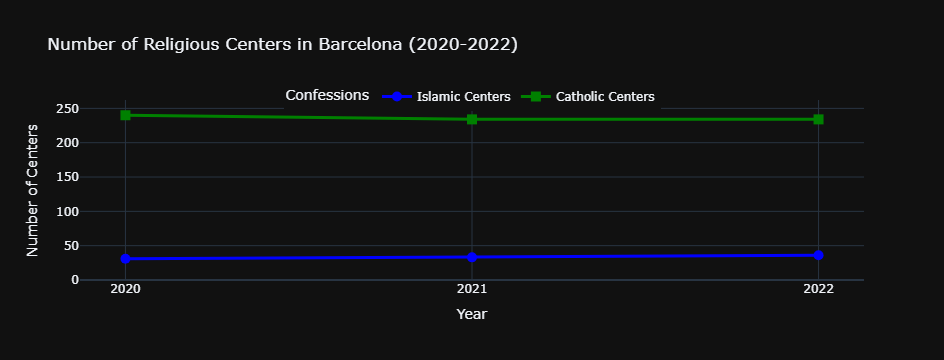

In [10]:
import numpy as np
import plotly.graph_objects as go

# Data for the plot
years = np.array([2020, 2021, 2022])

# Number of centers for Islam and Catholicism
islam_counts = np.array([islam_barcelona_2020, islam_barcelona_2021, islam_barcelona_2022])
catholic_counts = np.array([catholic_barcelona_2020, catholic_barcelona_2021, catholic_barcelona_2022])

# Create the plot
fig = go.Figure()

# Add the Islamic centers curve
fig.add_trace(go.Scatter(
    x=years,
    y=islam_counts,
    mode='lines+markers',
    name='Islamic Centers',
    line=dict(color='blue', width=3),
    marker=dict(size=10, symbol='circle')
))

# Add the Catholic centers curve
fig.add_trace(go.Scatter(
    x=years,
    y=catholic_counts,
    mode='lines+markers',
    name='Catholic Centers',
    line=dict(color='green', width=3),
    marker=dict(size=10, symbol='square')
))

# Customize the layout
fig.update_layout(
    title='Number of Religious Centers in Barcelona (2020-2022)',
    xaxis=dict(
        title='Year',
        tickmode='linear'
    ),
    yaxis=dict(
        title='Number of Centers',
        rangemode='tozero'
    ),
    legend=dict(
        title='Confessions',
        orientation='h',
        x=0.5,
        xanchor='center',
        y=1.1
    ),
    template='plotly_dark'  # Cool "dark mode" theme
)

# Show the plot
fig.show()
